In [1]:
from Bagging import create_models, create_bags, evaluate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import random
from BaggingSAv2 import BaggingSAv2

seed = None
np.random.seed(seed)
random.seed(seed)
data = datasets.load_digits()
# data = datasets.load_breast_cancer()


X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [2]:
def evaluate_bagging_sa(n_trees):
    bagging_sa_v2 = BaggingSAv2(X=X_train, y=y_train,
                                T0=10, alpha=0.98, max_iterations=1500, n_trees=n_trees)
    models = bagging_sa_v2.run(X_for_test=X_test, y_for_test=y_test, monitor_fun=fun_monitor)
    accuracy = evaluate(X_test, y_test, models=models)
    return accuracy, models


fit_acc_sum = {}
fitness_arr = []

def fun_monitor(iteration, T, best_fitness, fitness, new_fitness, accuracy):
    print(f"I: {iteration}, T: {T:.3f}, Best fitness: {best_fitness:.3f}, Fitness: {fitness:.3f}, New fitness: {new_fitness:.3f}, Accuracy: {accuracy:.3f}")
    if iteration not in fit_acc_sum:
        fit_acc_sum[new_fitness] = [accuracy]
    else:
        fit_acc_sum[new_fitness].append(accuracy)
    fitness_arr.append([iteration, best_fitness, accuracy])

acc_sa, models = evaluate_bagging_sa(n_trees=5)
fitness_df = pd.DataFrame(fitness_arr, columns=['Iteration', 'NewFitness', 'Accuracy'])

print(f"BaggingGAv2: {acc_sa:.3f}")

Fitness is the same, skipping iteration
I: 0, T: 10, Best fitness: 0.722, Fitness: 0.722, New fitness: 0.722, Accuracy: 0.750
I: 1, T: 9.8, Best fitness: 0.722, Fitness: 0.722, New fitness: 0.712, Accuracy: 0.747
I: 2, T: 9.604000000000001, Best fitness: 0.722, Fitness: 0.712, New fitness: 0.712, Accuracy: 0.764
I: 3, T: 9.41192, Best fitness: 0.722, Fitness: 0.712, New fitness: 0.743, Accuracy: 0.744
I: 4, T: 9.2236816, Best fitness: 0.743, Fitness: 0.743, New fitness: 0.754, Accuracy: 0.761
I: 5, T: 9.039207968000001, Best fitness: 0.754, Fitness: 0.754, New fitness: 0.757, Accuracy: 0.756
I: 6, T: 8.858423808640001, Best fitness: 0.757, Fitness: 0.757, New fitness: 0.736, Accuracy: 0.711
I: 7, T: 8.6812553324672, Best fitness: 0.757, Fitness: 0.736, New fitness: 0.716, Accuracy: 0.706
I: 8, T: 8.507630225817856, Best fitness: 0.757, Fitness: 0.716, New fitness: 0.757, Accuracy: 0.706
I: 9, T: 8.337477621301499, Best fitness: 0.757, Fitness: 0.757, New fitness: 0.760, Accuracy: 0.681

In [3]:
from Bagging import predict


for model in models:
    y_pred = predict(X_test, [model])
    acc = accuracy_score(y_test, y_pred)
    print(f"Model accuracy: {acc:.3f}")



Model accuracy: 0.108
Model accuracy: 0.058
Model accuracy: 0.114
Model accuracy: 0.156
Model accuracy: 0.150


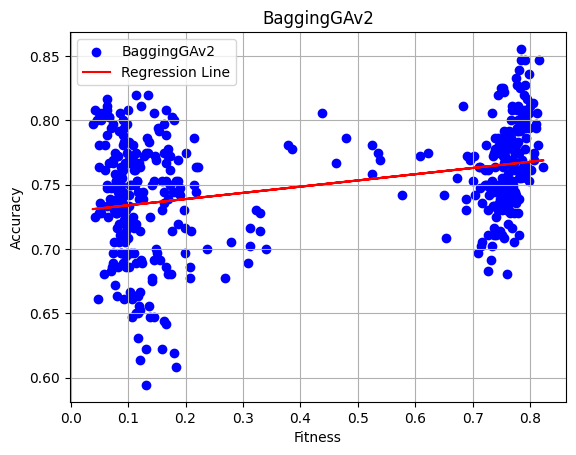

In [4]:
import matplotlib.pyplot as plt

X = np.array(list(fit_acc_sum.keys()))
Y = np.array([np.mean(fit_acc_sum[x]) for x in X])

coefficients = np.polyfit(X, Y, 1) 
regression_line = np.poly1d(coefficients)

Y_regression = regression_line(X)

plt.scatter(X, Y, label="BaggingGAv2", color="blue")
plt.plot(X, Y_regression, label="Regression Line", color="red")


plt.xlabel("Fitness")
plt.ylabel("Accuracy")
plt.title("BaggingGAv2")
plt.grid()
plt.legend()
plt.show()


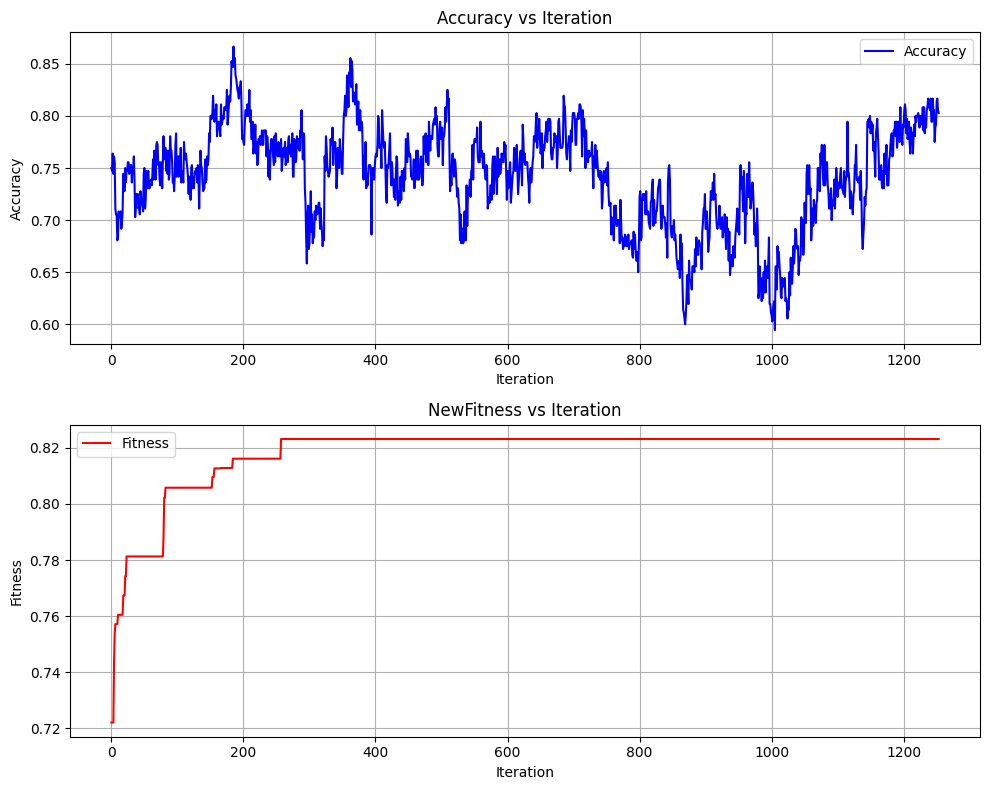

In [5]:
X = fitness_df['Iteration']
Y1 = fitness_df['Accuracy']
Y2 = fitness_df['NewFitness']

fig, axs = plt.subplots(2, 1, figsize=(10, 8))
axs[0].plot(X, Y1, label="Accuracy", color="blue")
axs[1].plot(X, Y2, label="Fitness", color="red")
axs[0].set_xlabel("Iteration")
axs[0].set_ylabel("Accuracy")
axs[1].set_xlabel("Iteration")
axs[1].set_ylabel("Fitness")
axs[0].set_title("Accuracy vs Iteration")
axs[1].set_title("NewFitness vs Iteration")
axs[0].grid()   
axs[1].grid()
axs[0].legend()
axs[1].legend()
plt.tight_layout()
plt.show()